In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("OneDrive/Masaüstü/Waiter Tips Prediction/tips.csv")

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## EDA

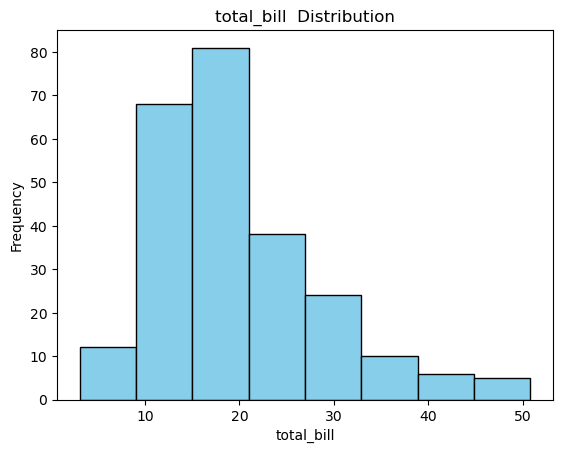

In [11]:
# Histogram çizimi
plt.hist(df['total_bill'], bins=8, color='skyblue', edgecolor='black')
plt.title('total_bill  Distribution')
plt.xlabel('total_bill')
plt.ylabel('Frequency')
plt.show()

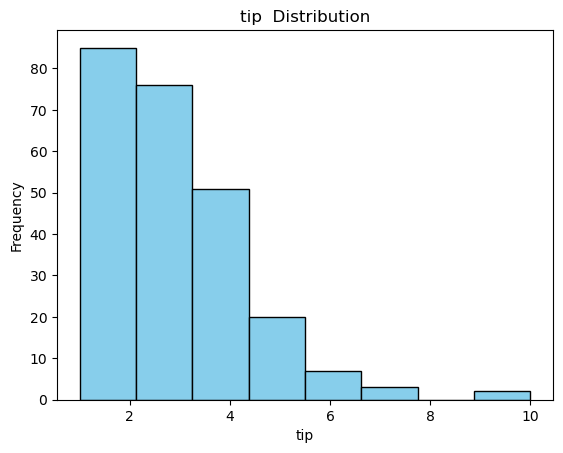

In [15]:
# Histogram çizimi
plt.hist(df['tip'], bins=8, color='skyblue', edgecolor='black')
plt.title('tip  Distribution')
plt.xlabel('tip')
plt.ylabel('Frequency')
plt.show()

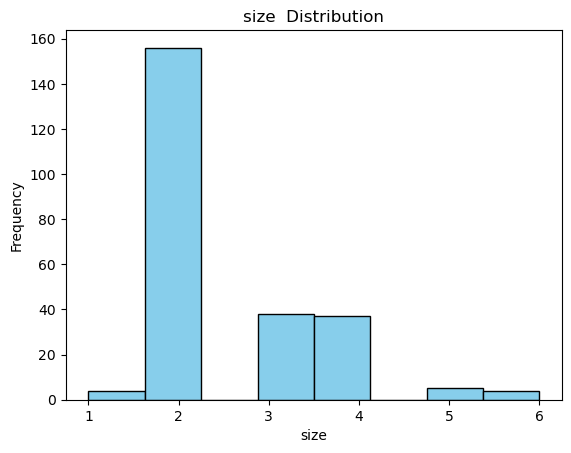

In [25]:
# Histogram çizimi
plt.hist(df['size'], bins=8, color='skyblue', edgecolor='black')
plt.title('size  Distribution')
plt.xlabel('size')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='total_bill'>

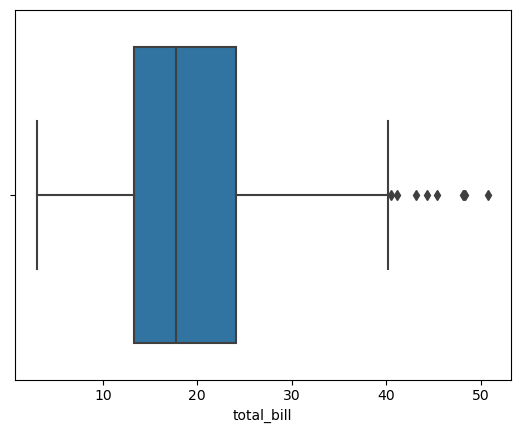

In [14]:
# boxplot çizimi
sns.boxplot(x=df["total_bill"])

<Axes: xlabel='size'>

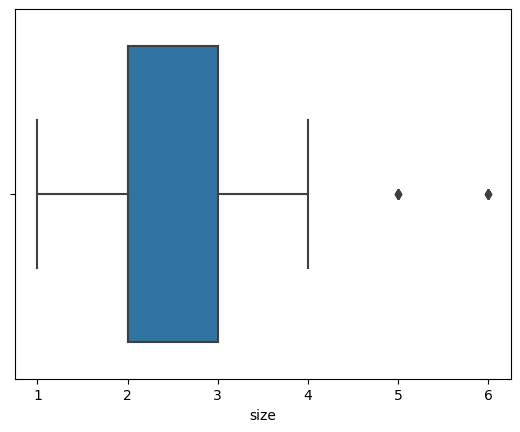

In [26]:
# boxplot çizimi
sns.boxplot(x=df["size"])

<Axes: xlabel='tip'>

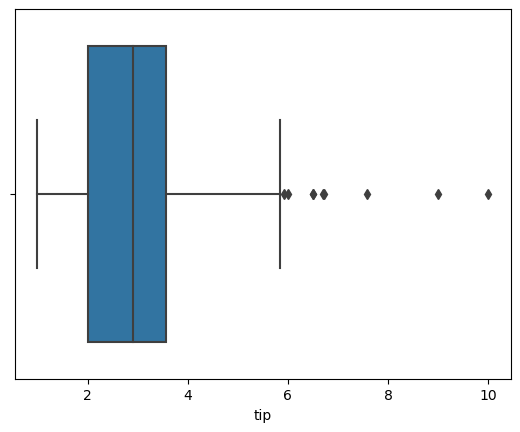

In [16]:
# boxplot çizimi
sns.boxplot(x=df["tip"])

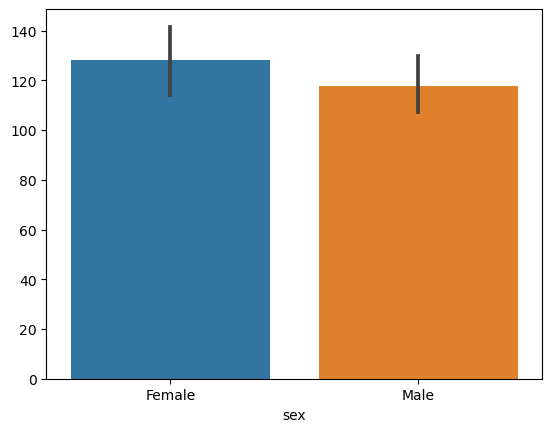

In [19]:
sns.barplot(x="sex",y=df.sex.index,data = df);

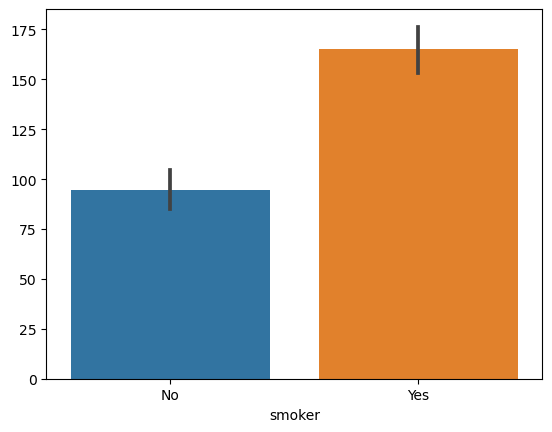

In [20]:
sns.barplot(x="smoker",y=df.smoker.index,data = df);

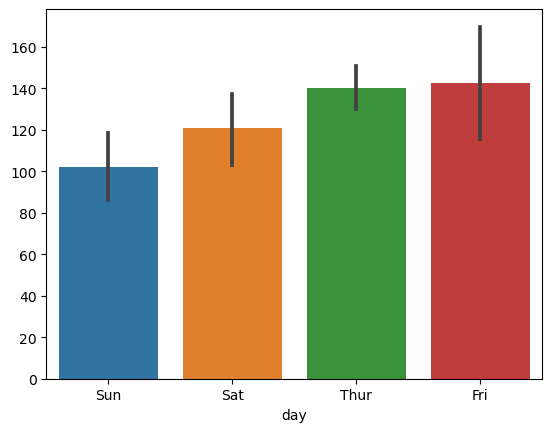

In [21]:
sns.barplot(x="day",y=df.day.index,data = df);

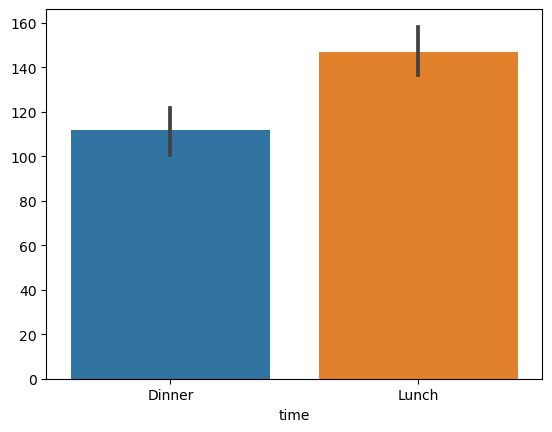

In [23]:
sns.barplot(x="time",y=df.time.index,data = df);

In [28]:
# Bahşişlerin ortalama Değerleri?
ort_tips = df["tip"].mean()
print("bahşişlerin ortalama değeri : ",ort_tips)

bahşişlerin ortalama değeri :  2.99827868852459


day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


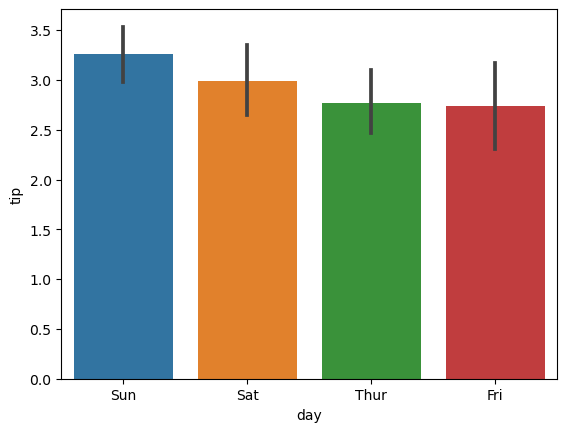

In [30]:
# Günlere göre ortalama bahşiş miktarı nedir?
sns.barplot(x="day",y="tip",data = df);
avarage_tip_per_day = df.groupby("day")["tip"].mean()
print(avarage_tip_per_day)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


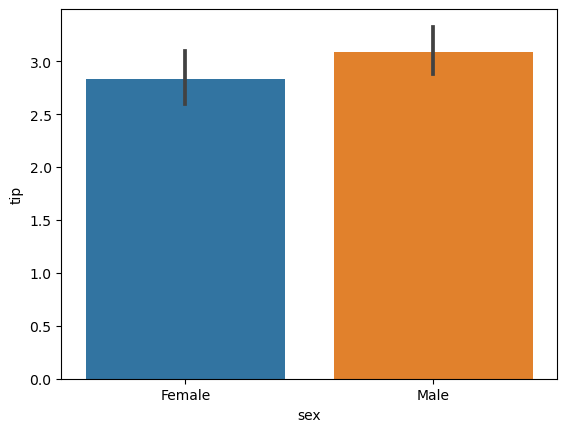

In [35]:
# Cinsiyete Göre Bahşiş Davranışı: (Erkekler ve kadınlar arasında bahşiş bırakma oranları)
sns.barplot(x = "sex", y = "tip",data = df);
sex_avg_tip = df.groupby("sex")["tip"].mean()
print(sex_avg_tip)

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


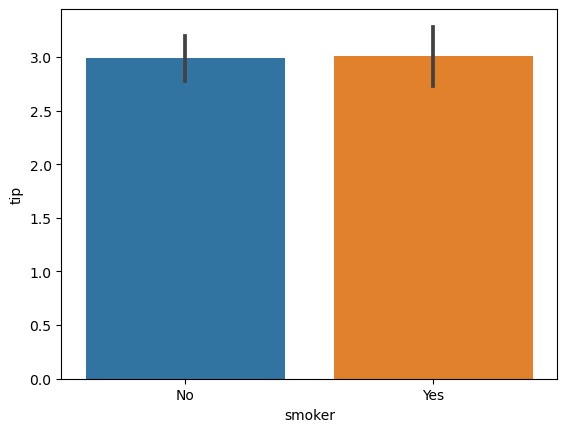

In [36]:
# Sigara Kullanımı ve Bahşiş İlişkisi: (Sigara içenler daha fazla bahşiş bırakıyor mu?)
sns.barplot(x = "smoker", y = "tip", data = df);
smoker_avg_tip = df.groupby("smoker")["tip"].mean()
print(smoker_avg_tip)

time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64


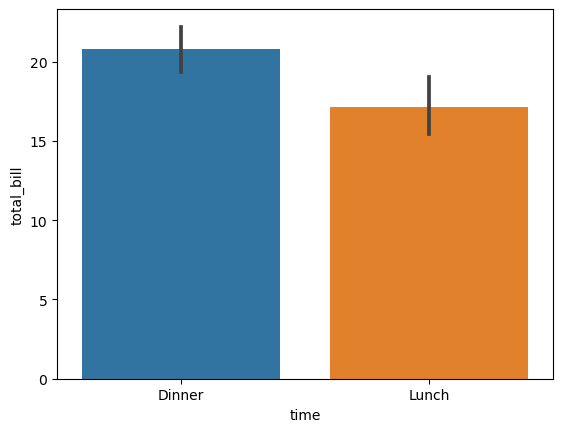

In [39]:
# Zaman ve Hesap Tutarı İlişkisi: (Öğle ve akşam yemekleri arasında toplam hesap tutarı açısından fark var mı?)
sns.barplot(x = "time", y = "total_bill", data=df);
time_avg_bill = df.groupby("time")["total_bill"].mean()
print(time_avg_bill)

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


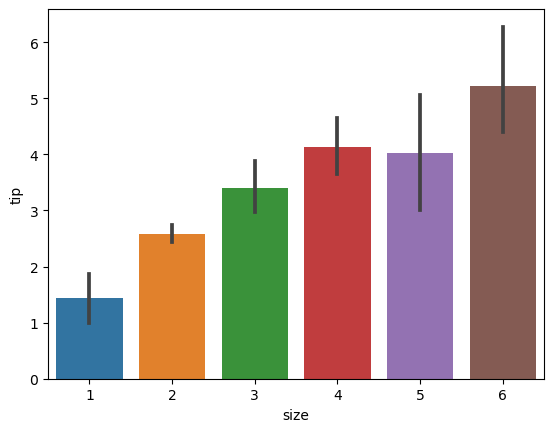

In [41]:
# Kişi Sayısı ve Bahşiş İlişkisi: (Masa büyüklüğü arttıkça verilen bahşiş miktarı artıyor mu?)
sns.barplot(x = "size", y = "tip", data = df);
size_avg_tip = df.groupby("size")["tip"].mean()
print(size_avg_tip)

In [42]:
# En Çok Bahşiş Hangi Gün Alınıyor? (Bahşişlerin dağılımına göre en kârlı gün hangisidir?)
most_tip_day = df.groupby("day")["tip"].max()
print(most_tip_day)

day
Fri      4.73
Sat     10.00
Sun      6.50
Thur     6.70
Name: tip, dtype: float64


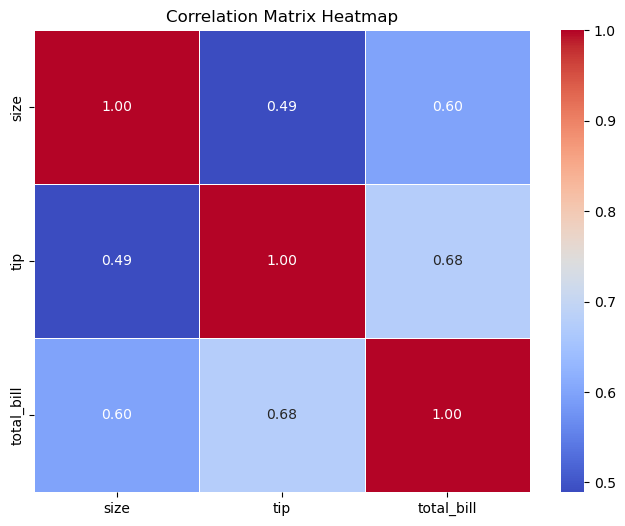

In [44]:
# Korelasyon Analizi: (Hesap tutarı, bahşiş ve masa büyüklüğü arasında güçlü bir ilişki var mı?)
correalition_matrix = df[['size','tip','total_bill']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correalition_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Machine Learning Section

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [46]:
# Kategorik sütunları sayısal verilere dönüştürme
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

In [48]:
# Bağımlı ve bağımsız değişkenler
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
# Training
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# tahmin
y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6948129686287711


In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Skoru: {r2}')

R² Skoru: 0.4441368826121931


In [54]:
# Rastgele Orman Regresyonu (Random Forest Regression) algoritmasını kullanarak eğitim yapılabilir !!!!